In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras import layers, models

#Loading the data

---



In [5]:
from google.colab import files
uploaded = files.upload()

Saving Teeth DataSet.zip to Teeth DataSet.zip


In [6]:
#unziping the file

import zipfile
import os

zip_file_path = '/content/Teeth DataSet.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

In [7]:
train_dir = '/content/dataset/Teeth DataSet/Teeth_Dataset/Training'
test_dir = '/content/dataset/Teeth DataSet/Teeth_Dataset/Testing'
validation_dir = '/content/dataset/Teeth DataSet/Teeth_Dataset/Validation'

###Data generator with augmentation

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

#Creating a data generator for validation and test (no augmentation, just rescaling)
test_val_datagen = ImageDataGenerator(rescale=1./255)


In [9]:
#loading the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

#loading the validation data
validation_generator = test_val_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

#loading the test data
test_generator = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


###Visualizing the data

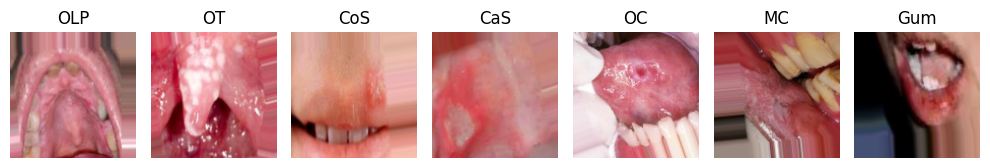

In [10]:
# Get class indices
class_indices = train_generator.class_indices
classes = list(class_indices.keys())

# Create a dictionary to store one image per class
class_images = {}

# Loop until we have one image per class
for _ in range(100):  # Arbitrary large number to ensure all classes are covered
    img_batch, label_batch = next(train_generator)  # Get a batch of augmented images and labels
    for img, label in zip(img_batch, label_batch):
        class_index = np.argmax(label)
        class_name = classes[class_index]
        if class_name not in class_images:
            # Convert the image from [0, 1] to [0, 255] and ensure it's uint8
            img_uint8 = (img * 255).astype(np.uint8)
            class_images[class_name] = img_uint8
        if len(class_images) == len(classes):  # Stop if we have one image per class
            break
    if len(class_images) == len(classes):
        break

# Set up a figure for plotting
fig = plt.figure(figsize=(10, 7))

# Plot one random image from each class
for i, (class_name, img) in enumerate(class_images.items(), start=1):
    ax = fig.add_subplot(1, len(classes), i)
    ax.set_title(class_name)
    ax.imshow(img)  # Now the image is in uint8 format
    ax.axis('off')

plt.tight_layout()
plt.show()


#Training the model (ResNet-50 pre-trained model)

In [12]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape=(128, 128, 3),
                                                  pooling='avg',classes=7,
                                                  weights='imagenet')

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(7, activation='softmax'))


In [13]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = resnet_model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


97/97 ━━━━━━━━━━━━━━━━━━━━ 113s 525ms/step - accuracy: 0.3616 - loss: 2.0777 - val_accuracy: 0.1751 - val_loss: 5.6492
Epoch 2/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 22s 207ms/step - accuracy: 0.5178 - loss: 1.4001 - val_accuracy: 0.1479 - val_loss: 2.6941
Epoch 3/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 40s 201ms/step - accuracy: 0.6250 - loss: 1.0477 - val_accuracy: 0.1449 - val_loss: 3.9641
Epoch 4/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 22s 212ms/step - accuracy: 0.7292 - loss: 0.8274 - val_accuracy: 0.1265 - val_loss: 3.0671
Epoch 5/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 41s 203ms/step - accuracy: 0.7600 - loss: 0.6905 - val_accuracy: 0.1449 - val_loss: 4.1820
Epoch 6/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 40s 199ms/step - accuracy: 0.7911 - loss: 0.5819 - val_accuracy: 0.1527 - val_loss: 2.1636
Epoch 7/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - accuracy: 0.8373 - loss: 0.4858 - val_accuracy: 0.1449 - val_loss: 3.7473
Epoch 8/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.8348 - loss: 0.4633 - val_accuracy: 0.25

#Evaluating the model

In [15]:
eval = resnet_model.evaluate(test_generator)
print("Test Loss:", eval[0])
print("Test Accuracy:", eval[1])

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7887 - loss: 0.7609
Test Loss: 0.7892664074897766
Test Accuracy: 0.7889105081558228


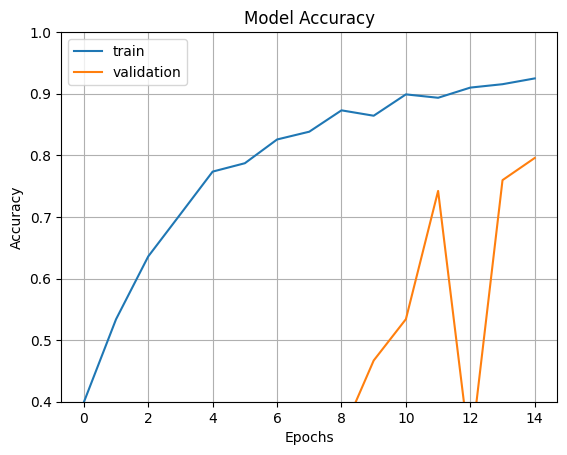

In [16]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

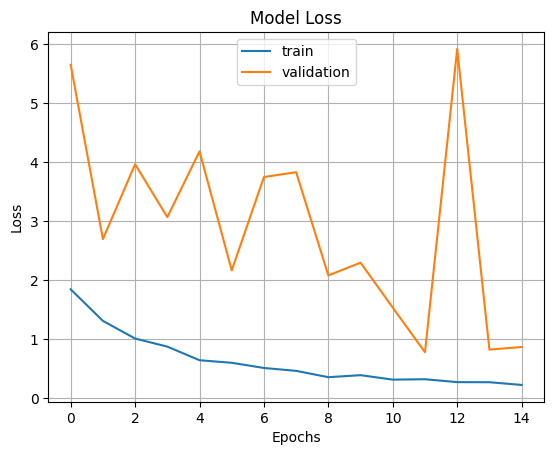

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

#Deploying on Streamlit

In [18]:
# After training the model
!mkdir models
resnet_model.save('models/teeth_classification_model.keras')

In [23]:
from google.colab import files
files.download('models/teeth_classification_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
!pip install streamlit -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00


In [21]:
!wget -q -O - ipv4.icanhazip.com

34.87.39.183


In [22]:
!npm install -g localtunnel@2.0.2


added 22 packages, and audited 23 packages in 4s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.87.39.183:8501

your url is: https://ripe-jars-return.loca.lt
